# Basic MLP

## Description

**Codabench accuracy** : 0.19

**Local test accuracy**: 0.75

**Description**: a simple Multi-Layer Perceptron with flattening layer

**Motivation**: this model was implemented to be used as a baseline for the subsequent models

## Google Drive - Connecting to the project

In [ ]:
from google.colab import drive
import sys
drive.mount('/content/drive')
project_path = "/content/drive/MyDrive/Colab Notebooks/ANN/le acque del friuli - Homework 1"
%cd {project_path}
sys.path.append(project_path)

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1CRSDpvo8yN6Wc7UchdjWSs6h8RroV7e4/le acque del friuli - Homework 1


## Imports

In [ ]:
%load_ext autoreload
%autoreload 2

import utils

import numpy as np
import tensorflow as tf
tfk = tf.keras
tfkl = tfk.layers

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Parameters

In [ ]:
# We are dealing with an 8-class problem with 96x96 RGB images as input
OUTPUT_SIZE = 8
INPUT_SHAPE = (96,96,3)

## Load Data

In [ ]:
# Cleaned dataset loading with a split in three datasets: training, validation, and test
X, y = utils.load_cleaned_dataset()
X_train, X_val, X_test, y_train, y_val, y_test = utils.split_dataset(X, y, test_size=0.2, val_size=0.2)

## Model Implementation

In [ ]:
# Definition of the model
def build_model():
    # The input layer takes 96x96 RGB images
    input_layer = tfkl.Input(shape=INPUT_SHAPE, name='Input')

    # Flattening layer for vectorization
    x = tfkl.Flatten()(input_layer)

    # Dense layer as output
    output_layer = tfkl.Dense(OUTPUT_SIZE, activation='softmax', name='Output')(x)
    model = tfk.Model(inputs=input_layer, outputs=output_layer)
    return model

In [ ]:
# Model contruction
model = build_model()

# Model compilation with Adam as optimizer and sparse categorical crossentropy as loss function
model.compile(optimizer=tfk.optimizers.Adam(),
              loss=tfk.losses.SparseCategoricalCrossentropy(), #Sparse since we are not one-hot-encoding (no difference)
              metrics=['accuracy'])

# Print model details
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 27648)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 8)                   │         221,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221,192 (864.03 KB)

 Trainable params: 221,192 (864.03 KB)

 Non-trainable params: 0 (0.00 B)

## Training

In [ ]:
# Parameters used for training
EPOCHS = 1000
BATCH_SIZE = 32
PATIENCE = 20

In [ ]:
# Implementation of early stopping as a technique to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PATIENCE)
callbacks = [early_stopping]

In [ ]:
# Actual training of the model with the given parameters
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_val,y_val),
                    callbacks=callbacks).history

Epoch 1/1000
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3018 - loss: 2944.3228 - val_accuracy: 0.5644 - val_loss: 443.3282
Epoch 2/1000
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5299 - loss: 375.7109 - val_accuracy: 0.5159 - val_loss: 391.4727
Epoch 3/1000
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5569 - loss: 402.1380 - val_accuracy: 0.4799 - val_loss: 527.1027
Epoch 4/1000
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5616 - loss: 482.9073 - val_accuracy: 0.6359 - val_loss: 417.3390
Epoch 5/1000
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5972 - loss: 514.8562 - val_accuracy: 0.5159 - val_loss: 704.5734
Epoch 6/1000
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5724 - loss: 614.1638 - val_accuracy: 0.7078 - val_loss: 272.5857
Epoch 7/1000
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6538 - loss: 352.2366 - val_accuracy: 0.5824 - val_loss: 699.2698
Epoch 8/1000
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

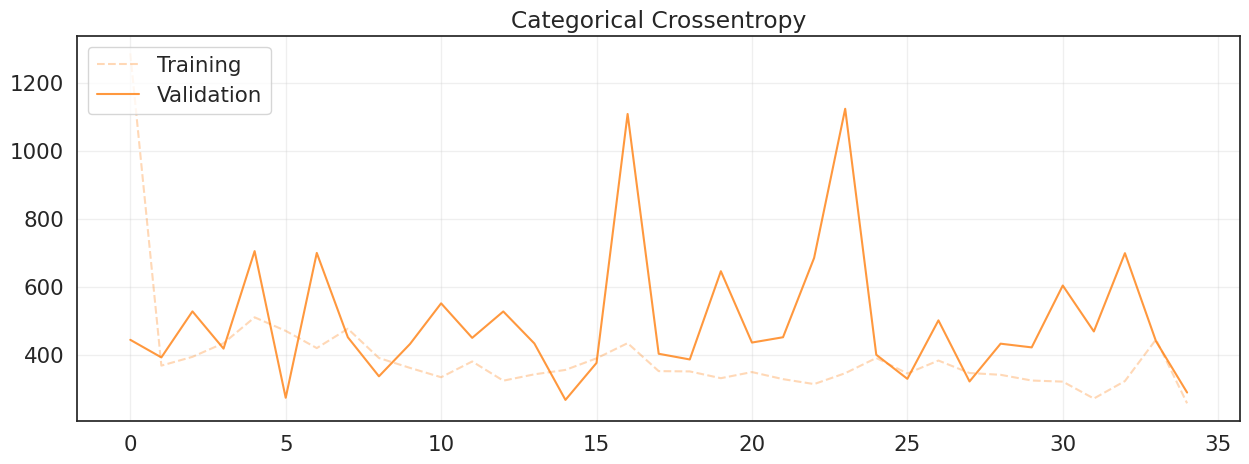

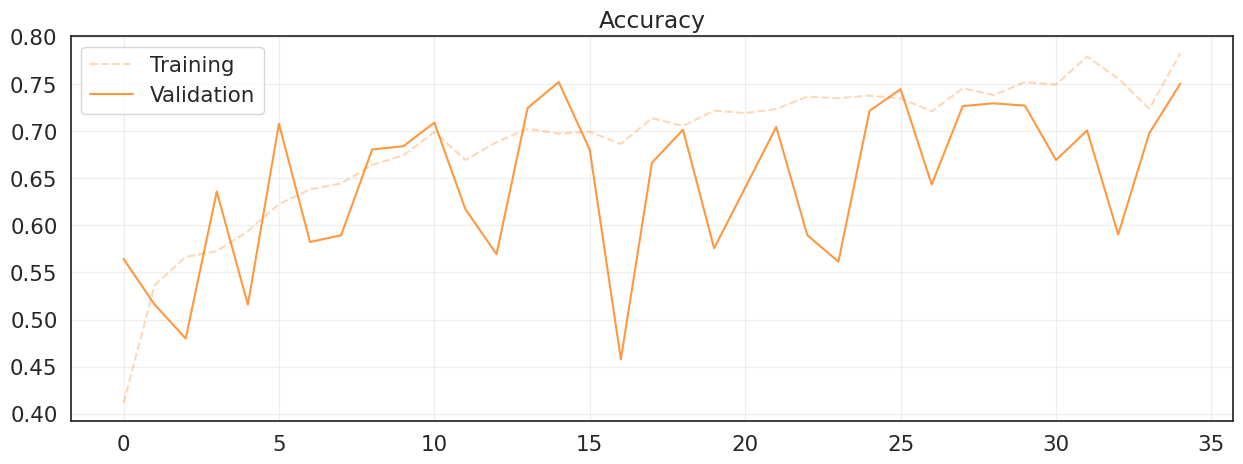

In [ ]:
# Plot the loss function and accuracy value over epochs
utils.plot_history(history)

## Save

In [ ]:
# Saving the model for testing and submission
accuracy = round(max(history['val_accuracy'])* 100, 2)
model_name = f"mlp_{accuracy}.keras"
%cd models/
print(f"Saving {model_name}")
model.save(model_name)
%cd ..
print("Model Saved")

/content/drive/.shortcut-targets-by-id/1CRSDpvo8yN6Wc7UchdjWSs6h8RroV7e4/le acque del friuli - Homework 1/models
Saving mlp_75.21.keras
/content/drive/.shortcut-targets-by-id/1CRSDpvo8yN6Wc7UchdjWSs6h8RroV7e4/le acque del friuli - Homework 1
Model Saved


## Test Prediction and Final Evaluation

In [ ]:
# Predict class probabilities and get predicted classes
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=1)

In [ ]:
# Calculate and display test set accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

# Calculate and display test set precision
test_precision = precision_score(y_test, test_predictions, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')

# Calculate and display test set recall
test_recall = recall_score(y_test, test_predictions, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')

# Calculate and display test set F1 score
test_f1 = f1_score(y_test, test_predictions, average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

Accuracy score over the test set: 0.7546
Precision score over the test set: 0.7714
Recall score over the test set: 0.7546
F1 score over the test set: 0.7383
